In [24]:
# Base utilities
import os

# Data Mining
import math
import random
random_state = 42
random.seed(random_state)
seed=random_state
import numpy as np
import pandas as pd
import geopandas as gpd
# import osmnx as ox
# import pandana as pdn
import pickle as pkl
import folium

import shap

# Plot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns

# Learning
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split, KFold

# Models
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Directories
for d in ["data", "models", "logs", "results"]:
    if not os.path.isdir(d):
        os.mkdir(d)


from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit

In [49]:
# Read
trips = pd.read_csv(f"results/trips_pre_model.csv",index_col=0)
# trips = pd.read_csv('/content/drive/MyDrive/Mobility_Choice/model/results/trips_pre_model.csv',index_col=0)
trips

,Modo,Hora_Ini_E,Dur_Tot,Per_hog,Turismos,Sexo,Edad,crnt_tur,Group,O_lat,...,30%,drive_tt,distance,walk_tt,transit_tt,transit_tt_gm,gm_ua,Tipo_familia,Mun_Ori,Mun_Des
0,Car,109,13.9,2,2,1,6,1,2194,43.315076,...,1,14.314333,7713.093,93.942367,36.442,60.0,0.488542,4,69,69
1,Car,62,15.1,2,2,1,4,1,1651,43.317024,...,1,12.797800,8962.584,145.466050,46.524,51.0,0.091793,2,69,69
2,PT,180,36.1,2,4,2,3,1,2731,43.324474,...,1,10.141033,6449.426,94.093417,30.343,36.0,0.170538,2,69,69
3,Car,198,17.5,3,2,1,5,1,1710,43.323712,...,1,13.098367,6794.456,84.678717,38.993,78.0,0.666826,2,69,69
4,PT,106,10.7,2,1,1,5,1,1646,43.311060,...,1,1.725333,768.076,12.326833,9.184,11.0,0.179945,2,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10313,Andando,83,15.4,2,1,1,4,2,347,43.305996,...,1,2.604183,1240.299,15.294017,7.962,18.0,0.773284,2,56,56
10314,Andando,100,5.3,1,2,2,4,1,358,43.307498,...,1,1.201000,495.243,5.661667,4.208,6.0,0.351097,3,56,56
10315,Andando,159,5.0,2,2,2,5,1,359,43.306916,...,1,0.691717,291.519,4.914900,3.656,6.0,0.485501,3,56,56
10316,Andando,93,14.3,1,1,1,2,2,347,43.307285,...,1,1.938700,862.164,14.051100,10.263,18.0,0.547500,2,56,56


# Cross validation

In [63]:
from sklearn.model_selection import GroupKFold

from sklearn.model_selection import GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Definir los modelos base
rf_clf = RandomForestClassifier(n_estimators=20, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42)
svm_clf = SVC(probability=True, random_state=1)

# Para VotingClassifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('mlp', mlp_clf), ('svm', svm_clf)], voting='hard')

# O para StackingClassifier
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('mlp', mlp_clf)],
                                  final_estimator=LogisticRegression())

# Definir el método de división de datos teniendo en cuenta los grupos
group_kfold = GroupKFold(n_splits=5)

# Puedes elegir entre voting_clf y stacking_clf dependiendo de tu preferencia
model = rf_clf  # o stacking_clf



# model = RandomForestClassifier(n_estimators=20,random_state=random_state)
model_name = type(model).__name__
k=10
gkf = GroupKFold(n_splits=k)

print(model_name,"\n")
print(f"{k}-FOLD CV\n")
# k fold cross validation

df = df_4

cv_scores = cross_val_score(model, df.drop(columns=["Modo", "Group"]), np.array(df["Modo"]), cv=gkf, groups = np.array(df["Group"]), n_jobs=-1)

# Scores on k-fold CV
# Imprimir el score de cada ronda
for i,score in zip(range(1,k+1),cv_scores):
    print(f"Round {i} score: {score}")
print("")

ax = sns.barplot(x = np.arange(1,k+1), y = np.array(cv_scores))
ax.set(xlabel='Round', ylabel='Accuracy',title=f"{k}-fold CV Accuracy plot")
plt.show()

# scores avg on k-fold CV
print(f"Score avg on {k}-fold CV: {cv_scores.mean()}\n")

#pickle
with open(os.path.join("models",f'{model_name}.pkl'), 'wb') as file:
    pkl.dump(model, file)

VotingClassifier 

10-FOLD CV



# Train-test with GroupkFold

In [93]:
# Min sampling

green = trips[trips['Modo'] != 'Car'].reset_index(drop=True)
car = trips[trips['Modo'] == 'Car'].reset_index(drop=True)

df_shuffled = car.sample(frac=1).reset_index(drop=True)
split_size = len(df_shuffled) // 3

# Split the DataFrame
df1_car = df_shuffled.iloc[:split_size].reset_index(drop=True)
df2_car = df_shuffled.iloc[split_size:2*split_size].reset_index(drop=True)
df3_car = df_shuffled.iloc[2*split_size:3*split_size].reset_index(drop=True)

df1 = pd.concat([green, df1_car], ignore_index=True)
df2 = pd.concat([green, df2_car], ignore_index=True)
df3 = pd.concat([green, df3_car], ignore_index=True)

df1 = df1.sample(frac=1).reset_index(drop=True)
df2 = df2.sample(frac=1).reset_index(drop=True)
df3 = df3.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle

# model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=random_state)

# class_weights = {
#     'Car': 1,         # The base weight
#     'PT': 6000/1800,  # More weight since it's less frequent
#     'Andando': 6000/2500 # More weight since it's less frequent but more so than 'pt'
# }

# model = KNeighborsClassifier(n_neighbors=20)
# model = SVC(kernel='linear', C=1.0, random_state=6000)
# model = RandomForestClassifier(n_estimators=20, random_state=6000, class_weight=class_weights)

model = RandomForestClassifier(n_estimators=20, random_state=6000)
model_name = type(model).__name__

df = trips

# X = trips.drop(columns=["Modo", "Group", "Mun_Ori", "Mun_Des", "Com_Ori", "Com_Des"])
X = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
y = np.array(df["Modo"])
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
groups = np.array(df["Group"])

accuracies = []

gkf = GroupKFold(n_splits=10)

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Store accuracy
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

    # print("Accuracy: ",model.score(X_test,y_test),"\n")
    # Prediction and Report
    y_pred = model.predict(X_test)
    # print("Classification Report\n")
    print(metrics.classification_report(y_test, y_pred),"\n")

    # print("Confusion Matrix\n")
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
    # models[model_name] = model

# pickle
with open(os.path.join(f"models",'rf_prueba.pkl'), 'wb') as file:
    pkl.dump(model, file)

# After all folds are done, plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), accuracies)
plt.title('Model Accuracies per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 11))  # to set the x-ticks for each fold
plt.show()
sum(accuracies) / len(accuracies)

In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

from sklearn.preprocessing import label_binarize

model = RandomForestClassifier(n_estimators=20, random_state=6000)
model_name = type(model).__name__

df = trips

X = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
y = np.array(df["Modo"])
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
groups = np.array(df["Group"])

accuracies = []

gkf = GroupKFold(n_splits=10)

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Store accuracy
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

    # print("Accuracy: ",model.score(X_test,y_test),"\n")
    # Prediction and Report
    y_pred = model.predict(X_test)
    # print("Classification Report\n")
    print(metrics.classification_report(y_test, y_pred),"\n")

    # print("Confusion Matrix\n")
    metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
    # models[model_name] = model

# pickle
with open(os.path.join(f"models",'rf_paper.pkl'), 'wb') as file:
    pkl.dump(model, file)

# After all folds are done, plot the accuracies
# plt.figure(figsize=(10, 6))
# plt.bar(range(1, 11), accuracies)
# plt.title('Model Accuracies per Fold')
# plt.xlabel('Fold')
# plt.ylabel('Accuracy')
# plt.xticks(range(1, 11))  # to set the x-ticks for each fold
# plt.show()
# sum(accuracies) / len(accuracies)

In [20]:
trips

,Modo,Hora_Ini_E,Dur_Tot,Per_hog,Turismos,Sexo,Edad,crnt_tur,Group,O_lat,...,30%,drive_tt,distance,walk_tt,transit_tt,transit_tt_gm,gm_ua,Tipo_familia,Mun_Ori,Mun_Des
0,Car,109,13.9,2,2,1,6,1,2194,43.315076,...,1,14.314333,7713.093,93.942367,36.442,60.0,0.488542,4,69,69
1,Car,62,15.1,2,2,1,4,1,1651,43.317024,...,1,12.797800,8962.584,145.466050,46.524,51.0,0.091793,2,69,69
2,PT,180,36.1,2,4,2,3,1,2731,43.324474,...,1,10.141033,6449.426,94.093417,30.343,36.0,0.170538,2,69,69
3,Car,198,17.5,3,2,1,5,1,1710,43.323712,...,1,13.098367,6794.456,84.678717,38.993,78.0,0.666826,2,69,69
4,PT,106,10.7,2,1,1,5,1,1646,43.311060,...,1,1.725333,768.076,12.326833,9.184,11.0,0.179945,2,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10313,Walk,83,15.4,2,1,1,4,2,347,43.305996,...,1,2.604183,1240.299,15.294017,7.962,18.0,0.773284,2,56,56
10314,Walk,100,5.3,1,2,2,4,1,358,43.307498,...,1,1.201000,495.243,5.661667,4.208,6.0,0.351097,3,56,56
10315,Walk,159,5.0,2,2,2,5,1,359,43.306916,...,1,0.691717,291.519,4.914900,3.656,6.0,0.485501,3,56,56
10316,Walk,93,14.3,1,1,1,2,2,347,43.307285,...,1,1.938700,862.164,14.051100,10.263,18.0,0.547500,2,56,56


In [51]:
trips['Modo'].value_counts()

Modo
Car     6008
Walk    2461
PT      1849
Name: count, dtype: int64

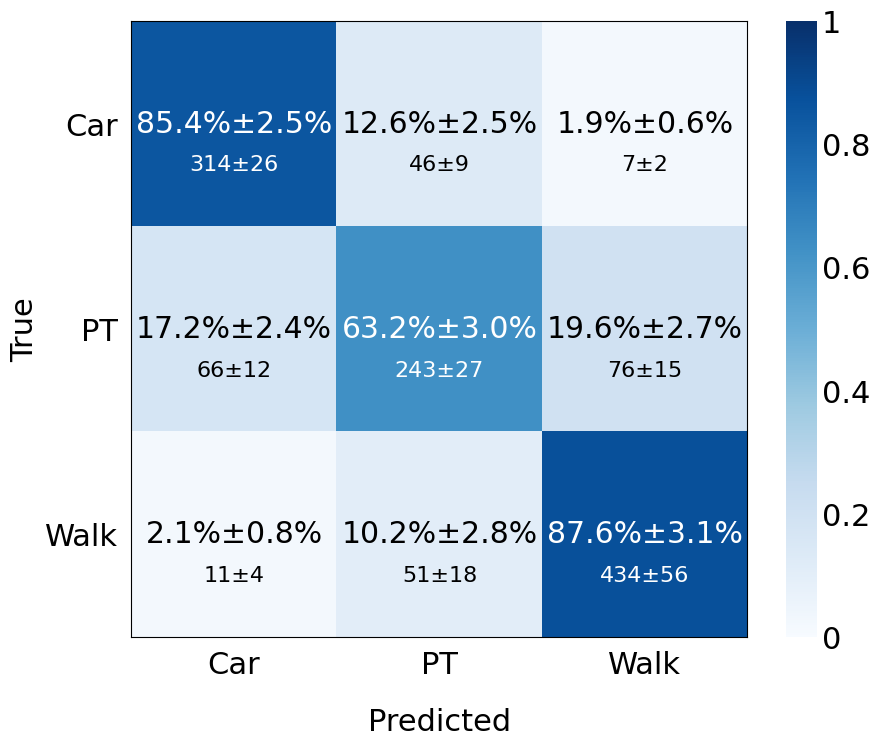

In [53]:
model = RandomForestClassifier(n_estimators=20, random_state=700)
model_name = type(model).__name__

df = trips
replacement_dict = {'Andando': 'Walk'}
df['Modo'] = df['Modo'].replace(replacement_dict)

# Create 10 different dfs
car_df = df[df['Modo'] == 'Car']
pt_df = df[df['Modo'] == 'PT']
walk_df = df[df['Modo'] == 'Walk']

dfs = []

for _ in range(10):
    sampled_car_df = car_df.sample(n=1849, replace=False)
    new_df = pd.concat([sampled_car_df, pt_df, walk_df])
    new_df = new_df.reset_index(drop=True)
    dfs.append(new_df)

confusion_matrices = []
confusion_matrices_w = []

for df in dfs:
    groups = df['Group']
    gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
    train_idx, test_idx = next(gss.split(df, groups=groups))
    train_set = df.iloc[train_idx]
    test_set = df.iloc[test_idx]

    X_train = train_set.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
    X_test = test_set.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
    y_train = np.array(train_set["Modo"])
    y_test = np.array(test_set["Modo"])

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    confusion_matrices.append(cm_normalized)
    confusion_matrices_w.append(cm)

## SECOND WEIGHTED MEAN AND STD DEV

def calculate_mean_and_std(confusion_matrices, categories):
    # Initialize sum of matrices and sum of squared matrices for variance calculation
    sum_of_matrices = np.zeros((categories, categories), dtype=float)
    sum_of_squares = np.zeros((categories, categories), dtype=float)

    # Sum all confusion matrices and their squares
    for cm in confusion_matrices:
        sum_of_matrices += cm
        sum_of_squares += cm**2

    # Compute simple mean
    n = len(confusion_matrices)
    simple_mean = sum_of_matrices / n

    # Compute variance and then standard deviation
    variance = (sum_of_squares - (sum_of_matrices**2 / n)) / n
    std_deviation = np.sqrt(variance)

    return simple_mean, std_deviation

def get_text_color(value, cmap, threshold=0.5):
    rgba = cmap(value)
    luminance = 0.299*rgba[0] + 0.587*rgba[1] + 0.114*rgba[2]
    return 'white' if luminance < threshold else 'black'

def plot_combined_matrix(mean_matrix, std_dev_matrix, title='Combined Mean and Std Dev'):
    cmap = plt.get_cmap('Reds')
    norm = plt.Normalize(vmin=mean_matrix.min(), vmax=mean_matrix.max())
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(mean_matrix, cmap='Reds', interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    # Label each cell with mean and std deviation
    for (i, j), val in np.ndenumerate(mean_matrix):
        text_color = get_text_color(norm(val), cmap)
        text = f'{val:.2f} ± {std_dev_matrix[i, j]:.2f}'
        ax.text(j, i, text, ha='center', va='center', color=text_color)

    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    # plt.show()

# Assuming you have a list of 10 confusion matrices stored in confusion_matrices and each matrix is of shape (3, 3)
categories = 3
mean, std_dev = calculate_mean_and_std(confusion_matrices_w, categories)

# Plot the combined mean and standard deviation
# plot_combined_matrix(mean, std_dev)

## DEFINITIVE

# Convert the list of matrices into a 3D numpy array for easier calculation
confusion_matrices = np.array(confusion_matrices)

# Compute mean and standard deviation across the first axis (the different folds)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
std_confusion_matrix = np.std(confusion_matrices, axis=0)

# vmin = np.min(mean_confusion_matrix)
# vmax = np.max(mean_confusion_matrix)
vmin = 0
vmax = 1

fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.cm.Blues
cax = ax.matshow(mean_confusion_matrix, cmap=cmap, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cax)
cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1])
cbar.set_ticklabels(['0', '0.2', '0.4', '0.6', '0.8', '1'])
cbar.ax.tick_params(length=0)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=22)

# for spine in ax.spines.values():
#     spine.set_visible(False)

ax.set_xticks(np.arange(len(label_encoder.classes_)))
ax.set_xticklabels(label_encoder.classes_, rotation=0, ha='center', fontsize=22)
ax.set_yticks(np.arange(len(label_encoder.classes_)))
ax.set_yticklabels(label_encoder.classes_, fontsize=22)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', which='major', pad=10)  # Ajusta el padding en el eje x
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='both', which='both', length=0)

# Annotating with mean and std values
for (i, j), val in np.ndenumerate(mean_confusion_matrix):
    rgba = cmap((val-vmin)/(vmax-vmin))  # Normalize the value and get RGBA from colormap
    luminance = 0.299 * rgba[0] + 0.587 * rgba[1] + 0.114 * rgba[2]  # Calculate luminance
    text_color = 'white' if luminance < 0.5 else 'black'
    # ax.text(j, i, f"{val:.2%}\n±{std_confusion_matrix[i, j]:.2%}", ha='center', va='center', fontsize=8)
    # Mean value with percentage format
    mean_text = f"{val:.1%}"
    # Standard deviation with percentage format
    std_text = f"±{std_confusion_matrix[i, j]:.1%}"

    mean2 = f"{mean[i, j]:.0f}"
    std2 = f"±{std_dev[i, j]:.0f}"

    # Concatenate mean and standard deviation with space
    # text_label = f"{mean_text}{std_text}\n{mean2}{std2}"
    
    # ax.text(j, i, text_label, ha='center', va='center', fontsize=10, color=text_color)

    # Define texts
    percent_text = f"{mean_text}{std_text}"
    values_text = f"{mean2}{std2}"
    
    # Draw text in two parts with different font sizes
    ax.text(j, i, percent_text, ha='center', va='center', color=text_color, fontsize=21.5)
    ax.text(j, i+0.2, values_text, ha='center', va='center', color=text_color, fontsize=16)

# plt.title('Mean and Std Dev of Normalized Confusion Matrix')
plt.xlabel('Predicted', fontsize=22, labelpad=20)
plt.ylabel('True', fontsize=22)
plt.show()

In [29]:
dfs[1]

,Modo,Hora_Ini_E,Dur_Tot,Per_hog,Turismos,Sexo,Edad,crnt_tur,Group,O_lat,...,30%,drive_tt,distance,walk_tt,transit_tt,transit_tt_gm,gm_ua,Tipo_familia,Mun_Ori,Mun_Des
0,Car,146,5.5,1,2,1,4,1,2841,43.060184,...,1,4.851217,1940.558,32.297983,24.068,23.0,0.045381,3,55,55
1,Car,186,10.5,2,1,1,5,1,655,43.311402,...,1,10.013850,7983.523,140.266700,30.176,34.0,0.119172,2,69,69
2,Car,147,10.9,2,3,2,5,1,457,43.310326,...,1,10.026200,5886.326,98.044867,27.724,35.0,0.232001,6,69,69
3,Car,70,22.9,2,3,2,4,1,1390,43.331160,...,1,21.942633,19469.995,318.943200,62.179,36.0,0.533291,2,45,69
4,Car,102,12.1,1,2,1,4,1,1740,43.321741,...,1,11.588300,9971.583,170.148483,35.025,32.0,0.090265,6,69,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,Walk,83,15.4,2,1,1,4,2,347,43.305996,...,1,2.604183,1240.299,15.294017,7.962,18.0,0.773284,2,56,56
6806,Walk,100,5.3,1,2,2,4,1,358,43.307498,...,1,1.201000,495.243,5.661667,4.208,6.0,0.351097,3,56,56
6807,Walk,159,5.0,2,2,2,5,1,359,43.306916,...,1,0.691717,291.519,4.914900,3.656,6.0,0.485501,3,56,56
6808,Walk,93,14.3,1,1,1,2,2,347,43.307285,...,1,1.938700,862.164,14.051100,10.263,18.0,0.547500,2,56,56


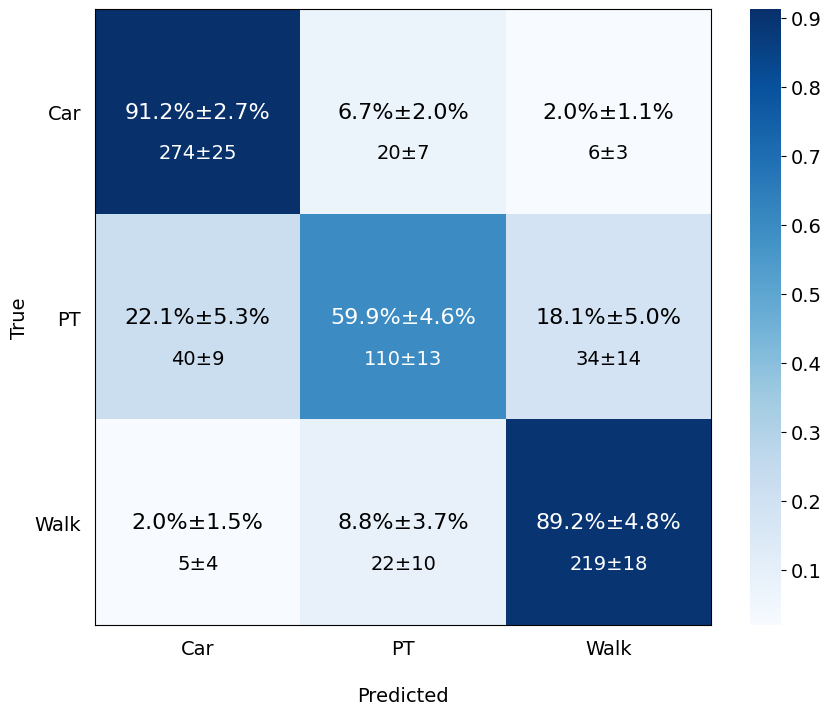

In [22]:
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

from sklearn.preprocessing import label_binarize

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns

class_weights = {
    'Car': 1,         # The base weight
    'PT': 6008*10/1849,  # More weight since it's less frequent
    'Walk': 6008*10/2461 # More weight since it's less frequent but more so than 'pt'
}

# model = RandomForestClassifier(n_estimators=20, random_state=700, class_weight='balanced')
model = RandomForestClassifier(n_estimators=20, random_state=700)
model_name = type(model).__name__

df = trips

rows_to_drop = df[df['Modo'] == 'Car'].sample(n=3000, random_state=1).index # 1698
df = df.drop(rows_to_drop)
df = df.reset_index(drop=True)

replacement_dict = {'Andando': 'Walk'}
df['Modo'] = df['Modo'].replace(replacement_dict)
X = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
y = np.array(df["Modo"])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
groups = np.array(df["Group"])

accuracies = []
confusion_matrices = []
confusion_matrices_w = []
class_counts = np.zeros(len(np.unique(y_encoded)))

gkf = GroupKFold(n_splits=10)

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Store accuracy
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

    # print("Accuracy: ",model.score(X_test,y_test),"\n")
    # Prediction and Report
    # print("Classification Report\n")
    # print(metrics.classification_report(y_test, y_pred),"\n")

    # print("Confusion Matrix\n")
    # metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
    # models[model_name] = model

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
    confusion_matrices.append(cm_normalized)
    confusion_matrices_w.append(cm)

    # Display the normalized confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label_encoder.classes_)
    # disp.plot(cmap='Reds', values_format=".1%")

    # plt.title(f'Normalized Confusion Matrix Fold {len(accuracies)}')
    # plt.show()

    # Accumulate total counts for each class
    for label in np.unique(y_encoded):
        class_counts[label] += (y_test == label).sum()

## SECOND WEIGHTED MEAN AND STD DEV

import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_and_std(confusion_matrices, categories):
    # Initialize sum of matrices and sum of squared matrices for variance calculation
    sum_of_matrices = np.zeros((categories, categories), dtype=float)
    sum_of_squares = np.zeros((categories, categories), dtype=float)

    # Sum all confusion matrices and their squares
    for cm in confusion_matrices:
        sum_of_matrices += cm
        sum_of_squares += cm**2

    # Compute simple mean
    n = len(confusion_matrices)
    simple_mean = sum_of_matrices / n

    # Compute variance and then standard deviation
    variance = (sum_of_squares - (sum_of_matrices**2 / n)) / n
    std_deviation = np.sqrt(variance)

    return simple_mean, std_deviation

def get_text_color(value, cmap, threshold=0.5):
    rgba = cmap(value)
    luminance = 0.299*rgba[0] + 0.587*rgba[1] + 0.114*rgba[2]
    return 'white' if luminance < threshold else 'black'

def plot_combined_matrix(mean_matrix, std_dev_matrix, title='Combined Mean and Std Dev'):
    cmap = plt.get_cmap('Reds')
    norm = plt.Normalize(vmin=mean_matrix.min(), vmax=mean_matrix.max())
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(mean_matrix, cmap='Reds', interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    # Label each cell with mean and std deviation
    for (i, j), val in np.ndenumerate(mean_matrix):
        text_color = get_text_color(norm(val), cmap)
        text = f'{val:.2f} ± {std_dev_matrix[i, j]:.2f}'
        ax.text(j, i, text, ha='center', va='center', color=text_color)

    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    # plt.show()

# Assuming you have a list of 10 confusion matrices stored in confusion_matrices and each matrix is of shape (3, 3)
categories = 3
mean, std_dev = calculate_mean_and_std(confusion_matrices_w, categories)

# Plot the combined mean and standard deviation
# plot_combined_matrix(mean, std_dev)

## DEFINITIVE

# Convert the list of matrices into a 3D numpy array for easier calculation
confusion_matrices = np.array(confusion_matrices)

# Compute mean and standard deviation across the first axis (the different folds)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
std_confusion_matrix = np.std(confusion_matrices, axis=0)

vmin = np.min(mean_confusion_matrix)
vmax = np.max(mean_confusion_matrix)

fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.cm.Blues
cax = ax.matshow(mean_confusion_matrix, cmap=cmap, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cax)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=14)

# for spine in ax.spines.values():
#     spine.set_visible(False)

ax.set_xticks(np.arange(len(label_encoder.classes_)))
ax.set_xticklabels(label_encoder.classes_, rotation=0, ha='center', fontsize=14)
ax.set_yticks(np.arange(len(label_encoder.classes_)))
ax.set_yticklabels(label_encoder.classes_, fontsize=14)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', which='major', pad=10)  # Ajusta el padding en el eje x
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='both', which='both', length=0)

# Annotating with mean and std values
for (i, j), val in np.ndenumerate(mean_confusion_matrix):
    rgba = cmap((val-vmin)/(vmax-vmin))  # Normalize the value and get RGBA from colormap
    luminance = 0.299 * rgba[0] + 0.587 * rgba[1] + 0.114 * rgba[2]  # Calculate luminance
    text_color = 'white' if luminance < 0.5 else 'black'
    # ax.text(j, i, f"{val:.2%}\n±{std_confusion_matrix[i, j]:.2%}", ha='center', va='center', fontsize=8)
    # Mean value with percentage format
    mean_text = f"{val:.1%}"
    # Standard deviation with percentage format
    std_text = f"±{std_confusion_matrix[i, j]:.1%}"

    mean2 = f"{mean[i, j]:.0f}"
    std2 = f"±{std_dev[i, j]:.0f}"

    # Concatenate mean and standard deviation with space
    # text_label = f"{mean_text}{std_text}\n{mean2}{std2}"
    
    # ax.text(j, i, text_label, ha='center', va='center', fontsize=10, color=text_color)

    # Define texts
    percent_text = f"{mean_text}{std_text}"
    values_text = f"{mean2}{std2}"
    
    # Draw text in two parts with different font sizes
    ax.text(j, i, percent_text, ha='center', va='center', color=text_color, fontsize=16)
    ax.text(j, i+0.2, values_text, ha='center', va='center', color=text_color, fontsize=14)

# plt.title('Mean and Std Dev of Normalized Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, labelpad=20)
plt.ylabel('True', fontsize=14)
plt.show()

C:\Users\iazka\AppData\Local\Temp\ipykernel_2088\4022049669.py:111: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + label_encoder.classes_.tolist(), rotation=45)
C:\Users\iazka\AppData\Local\Temp\ipykernel_2088\4022049669.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + label_encoder.classes_.tolist())


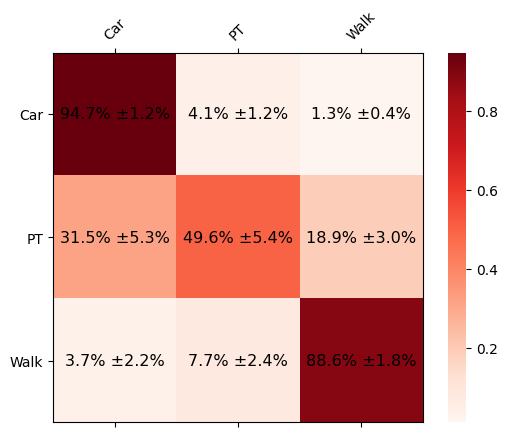

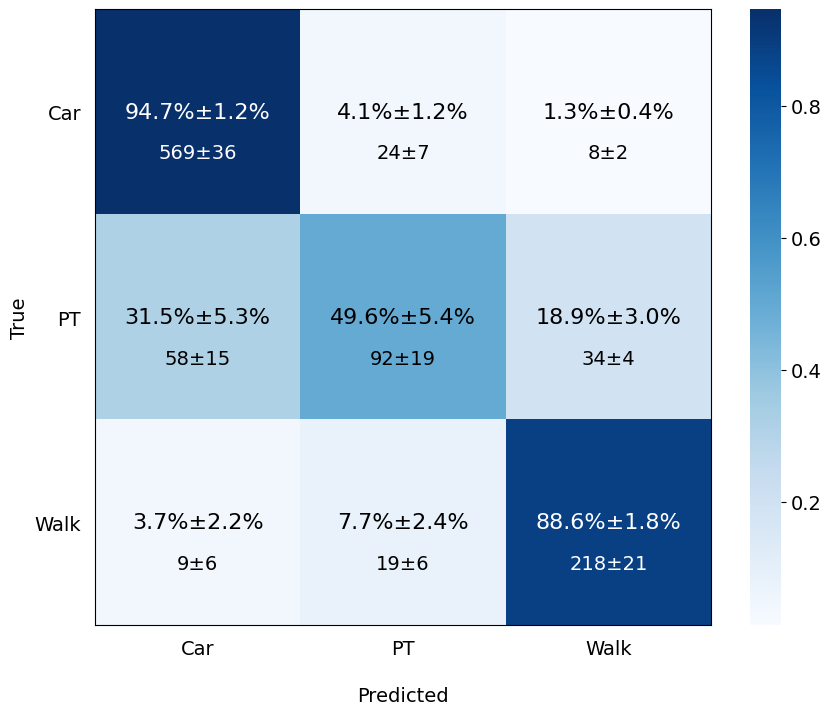

In [18]:
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from itertools import cycle

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

from sklearn.preprocessing import label_binarize

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns

class_weights = {
    'Car': 1,         # The base weight
    'PT': 6008*10/1849,  # More weight since it's less frequent
    'Walk': 6008*10/2461 # More weight since it's less frequent but more so than 'pt'
}

model = RandomForestClassifier(n_estimators=20, random_state=700, class_weight='balanced')
# model = RandomForestClassifier(n_estimators=20, random_state=700)
model_name = type(model).__name__

df = trips

# rows_to_drop = df[df['Modo'] == 'Car'].sample(n=1698, random_state=1).index
# df = df.drop(rows_to_drop)
# df = df.reset_index(drop=True)

replacement_dict = {'Andando': 'Walk'}
df['Modo'] = df['Modo'].replace(replacement_dict)
X = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
y = np.array(df["Modo"])

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
groups = np.array(df["Group"])

accuracies = []
confusion_matrices = []
confusion_matrices_w = []
class_counts = np.zeros(len(np.unique(y_encoded)))

gkf = GroupKFold(n_splits=10)

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    model.fit(X_train, y_train)

    # Store accuracy
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

    # print("Accuracy: ",model.score(X_test,y_test),"\n")
    # Prediction and Report
    # print("Classification Report\n")
    # print(metrics.classification_report(y_test, y_pred),"\n")

    # print("Confusion Matrix\n")
    # metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap="Reds")
    # models[model_name] = model

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the confusion matrix
    confusion_matrices.append(cm_normalized)
    confusion_matrices_w.append(cm)

    # Display the normalized confusion matrix
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=label_encoder.classes_)
    # disp.plot(cmap='Reds', values_format=".1%")

    # plt.title(f'Normalized Confusion Matrix Fold {len(accuracies)}')
    # plt.show()

    # Accumulate total counts for each class
    for label in np.unique(y_encoded):
        class_counts[label] += (y_test == label).sum()

## PERCENTAGE

# Convert the list of matrices into a 3D numpy array for easier calculation
confusion_matrices = np.array(confusion_matrices)

# Compute mean and standard deviation across the first axis (the different folds)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
std_confusion_matrix = np.std(confusion_matrices, axis=0)

vmin = np.min(mean_confusion_matrix)
vmax = np.max(mean_confusion_matrix)

# Plotting or printing the result
fig, ax = plt.subplots()
cax = ax.matshow(mean_confusion_matrix, cmap='Reds', vmin=vmin, vmax=vmax)
# fig.colorbar(cax)
cbar = fig.colorbar(cax)
cbar.outline.set_visible(False)

# for spine in ax.spines.values():
#     spine.set_visible(False)

ax.set_xticklabels([''] + label_encoder.classes_.tolist(), rotation=45)
ax.set_yticklabels([''] + label_encoder.classes_.tolist())

# Annotating with mean and std values
for (i, j), val in np.ndenumerate(mean_confusion_matrix):
    # ax.text(j, i, f"{val:.2%}\n±{std_confusion_matrix[i, j]:.2%}", ha='center', va='center', fontsize=8)
    # Mean value with percentage format
    mean_text = f"{val:.1%}"
    # Standard deviation with percentage format
    std_text = f"±{std_confusion_matrix[i, j]:.1%}"
    # Concatenate mean and standard deviation with space
    text_label = f"{mean_text} {std_text}"
    
    ax.text(j, i, text_label, ha='center', va='center', fontsize=11.5)

# plt.title('Mean and Std Dev of Normalized Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

## WEIGHTED MEAN AND STANDARD DEVIATION

# Calculate weighted averages and standard deviations
def calculate_weighted_stats(confusion_matrices, categories):
    sum_of_products = np.zeros((categories, categories), dtype=float)
    total_sums = np.zeros(categories, dtype=float)
    variance_sums = np.zeros_like(sum_of_products)

    # Sum products for mean and prepare for variance calculation
    for cm in confusion_matrices:
        for i in range(categories):
            row_sum = cm[i, :].sum()
            sum_of_products[i, :] += cm[i, :] * row_sum
            total_sums[i] += row_sum

    # Calculate weighted mean
    weighted_mean = np.zeros_like(sum_of_products)
    for i in range(categories):
        if total_sums[i] > 0:
            weighted_mean[i, :] = sum_of_products[i, :] / total_sums[i]

    # Calculate variance sums
    for cm in confusion_matrices:
        for i in range(categories):
            row_sum = cm[i, :].sum()
            for j in range(categories):
                diff = cm[i, j] - weighted_mean[i, j]
                variance_sums[i, j] += (diff ** 2) * row_sum

    # Calculate weighted standard deviation
    weighted_std_dev = np.zeros_like(sum_of_products)
    for i in range(categories):
        if total_sums[i] > 0:
            weighted_std_dev[i, :] = np.sqrt(variance_sums[i, :] / total_sums[i])

    return weighted_mean, weighted_std_dev

def get_text_color(value, cmap, threshold=0.5):
    rgba = cmap(value)
    # Using the formula for luminance to determine if the color is light or dark
    luminance = 0.299*rgba[0] + 0.587*rgba[1] + 0.114*rgba[2]
    return 'white' if luminance < threshold else 'black'

# Plot combined mean and std dev
def plot_combined_matrix(weighted_mean, weighted_std_dev):
    cmap = plt.get_cmap('Reds')
    norm = plt.Normalize(vmin=weighted_mean.min(), vmax=weighted_mean.max())
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(weighted_mean, cmap='Reds', interpolation='nearest')
    ax.set_title('Weighted Mean + Std Dev')
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    # Label each cell with mean and std dev
    for (i, j), val in np.ndenumerate(weighted_mean):
        text = f'{val:.1f} + {weighted_std_dev[i, j]:.1f}'
        text_color = get_text_color(norm(val), cmap)
        ax.text(j, i, text, ha='center', va='center', color=text_color)
    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    # plt.show()

# Generate matrices and calculate stats
weighted_mean, weighted_std_dev = calculate_weighted_stats(confusion_matrices_w, categories=3)

# Plot the combined weighted mean and standard deviation
# plot_combined_matrix(weighted_mean, weighted_std_dev)

## SECOND WEIGHTED MEAN AND STD DEV

import numpy as np
import matplotlib.pyplot as plt

def calculate_mean_and_std(confusion_matrices, categories):
    # Initialize sum of matrices and sum of squared matrices for variance calculation
    sum_of_matrices = np.zeros((categories, categories), dtype=float)
    sum_of_squares = np.zeros((categories, categories), dtype=float)

    # Sum all confusion matrices and their squares
    for cm in confusion_matrices:
        sum_of_matrices += cm
        sum_of_squares += cm**2

    # Compute simple mean
    n = len(confusion_matrices)
    simple_mean = sum_of_matrices / n

    # Compute variance and then standard deviation
    variance = (sum_of_squares - (sum_of_matrices**2 / n)) / n
    std_deviation = np.sqrt(variance)

    return simple_mean, std_deviation

def get_text_color(value, cmap, threshold=0.5):
    rgba = cmap(value)
    luminance = 0.299*rgba[0] + 0.587*rgba[1] + 0.114*rgba[2]
    return 'white' if luminance < threshold else 'black'

def plot_combined_matrix(mean_matrix, std_dev_matrix, title='Combined Mean and Std Dev'):
    cmap = plt.get_cmap('Reds')
    norm = plt.Normalize(vmin=mean_matrix.min(), vmax=mean_matrix.max())
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(mean_matrix, cmap='Reds', interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    # Label each cell with mean and std deviation
    for (i, j), val in np.ndenumerate(mean_matrix):
        text_color = get_text_color(norm(val), cmap)
        text = f'{val:.2f} ± {std_dev_matrix[i, j]:.2f}'
        ax.text(j, i, text, ha='center', va='center', color=text_color)

    fig.colorbar(im, ax=ax)
    plt.tight_layout()
    # plt.show()

# Assuming you have a list of 10 confusion matrices stored in confusion_matrices and each matrix is of shape (3, 3)
categories = 3
mean, std_dev = calculate_mean_and_std(confusion_matrices_w, categories)

# Plot the combined mean and standard deviation
# plot_combined_matrix(mean, std_dev)

## DEFINITIVE

# Convert the list of matrices into a 3D numpy array for easier calculation
confusion_matrices = np.array(confusion_matrices)

# Compute mean and standard deviation across the first axis (the different folds)
mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
std_confusion_matrix = np.std(confusion_matrices, axis=0)

vmin = np.min(mean_confusion_matrix)
vmax = np.max(mean_confusion_matrix)

fig, ax = plt.subplots(figsize=(10, 8))
cmap = plt.cm.Blues
cax = ax.matshow(mean_confusion_matrix, cmap=cmap, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(cax)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=14)

# for spine in ax.spines.values():
#     spine.set_visible(False)

# ax.set_xticklabels([''] + label_encoder.classes_.tolist(), rotation=45)
# ax.set_yticklabels([''] + label_encoder.classes_.tolist())

ax.set_xticks(np.arange(len(label_encoder.classes_)))
ax.set_xticklabels(label_encoder.classes_, rotation=0, ha='center', fontsize=14)
ax.set_yticks(np.arange(len(label_encoder.classes_)))
ax.set_yticklabels(label_encoder.classes_, fontsize=14)
ax.xaxis.set_ticks_position('bottom')
ax.tick_params(axis='x', which='major', pad=10)  # Ajusta el padding en el eje x
ax.tick_params(axis='y', which='major', pad=10)
ax.tick_params(axis='both', which='both', length=0)

# Annotating with mean and std values
for (i, j), val in np.ndenumerate(mean_confusion_matrix):
    rgba = cmap((val-vmin)/(vmax-vmin))  # Normalize the value and get RGBA from colormap
    luminance = 0.299 * rgba[0] + 0.587 * rgba[1] + 0.114 * rgba[2]  # Calculate luminance
    text_color = 'white' if luminance < 0.5 else 'black'
    # ax.text(j, i, f"{val:.2%}\n±{std_confusion_matrix[i, j]:.2%}", ha='center', va='center', fontsize=8)
    # Mean value with percentage format
    mean_text = f"{val:.1%}"
    # Standard deviation with percentage format
    std_text = f"±{std_confusion_matrix[i, j]:.1%}"

    mean2 = f"{mean[i, j]:.0f}"
    std2 = f"±{std_dev[i, j]:.0f}"

    # Concatenate mean and standard deviation with space
    # text_label = f"{mean_text}{std_text}\n{mean2}{std2}"
    
    # ax.text(j, i, text_label, ha='center', va='center', fontsize=10, color=text_color)

    # Define texts
    percent_text = f"{mean_text}{std_text}"
    values_text = f"{mean2}{std2}"
    
    # Draw text in two parts with different font sizes
    ax.text(j, i, percent_text, ha='center', va='center', color=text_color, fontsize=16)
    ax.text(j, i+0.2, values_text, ha='center', va='center', color=text_color, fontsize=14)

# plt.title('Mean and Std Dev of Normalized Confusion Matrix')
plt.xlabel('Predicted', fontsize=14, labelpad=20)
plt.ylabel('True', fontsize=14)
plt.show()

# ROC VALUE

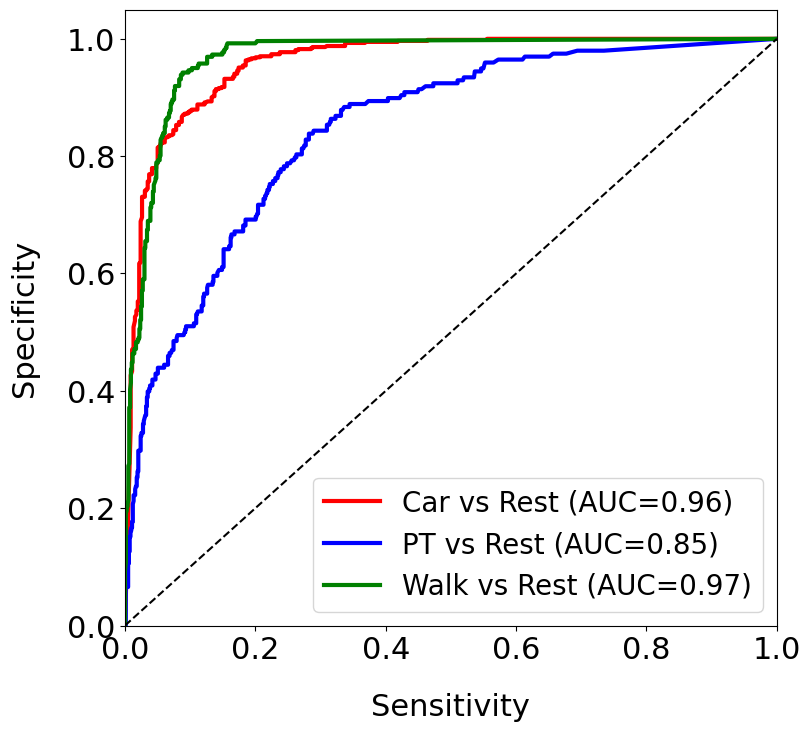

In [61]:
df = trips
# rows_to_drop = df[df['Modo'] == 'Car'].sample(n=0, random_state=8).index
# df = df.drop(rows_to_drop)
df = df.reset_index(drop=True)
replacement_dict = {'Andando': 'Walk'}
df['Modo'] = df['Modo'].replace(replacement_dict)
X = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
y = np.array(df["Modo"])
groups = np.array(df["Group"])

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y=label_encoder.transform(y)
classes=label_encoder.classes_

color_dict = {'Car': 'red', 'Walk': 'green', 'PT': 'blue'}

for train_index, test_index in gkf.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()

plt.figure(figsize=(10, 8))
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc

RF=OneVsRestClassifier(RandomForestClassifier(max_features=7))
RF.fit(X_train_norm,y_train)
y_pred =RF.predict(X_test_norm)
pred_prob = RF.predict_proba(X_test_norm)

from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    
    plt.plot(fpr[i], tpr[i], linestyle='-', 
             color=color_dict[classes[i]], label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]), linewidth=3)
    
# pickle
with open(os.path.join(f"models",'rf_paper.pkl'), 'wb') as file:
    pkl.dump(model, file)
    
plt.plot([0,1],[0,1],'--', color='black')
# plt.gca().set_aspect('equal', adjustable='box')
plt.gca().set_aspect(0.9)
plt.xlim([0,1])
plt.ylim([0,1.05])
# plt.title('Multiclass ROC curve')
plt.xlabel('Sensitivity', fontsize=22, labelpad=20)
plt.ylabel('Specificity', fontsize=22, labelpad=20)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(loc='lower right', fontsize=20)
plt.show()

# Variable Importance

In [62]:
model_name = "rf_paper"  # El nombre del modelo que guardaste anteriormente
file_path = os.path.join("models", f'{model_name}.pkl')

with open(file_path, 'rb') as file:
    model = pkl.load(file)

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = trips # CHANGE IT! TAKE 2500 O LO QUE SEAN
# rows_to_drop = df[df['Modo'] == 'Car'].sample(n=0, random_state=8).index
# df = df.drop(rows_to_drop)
# df = df.reset_index(drop=True)
# replacement_dict = {'Andando': 'Walk'}
replacement_dict = {'Car': 0, 'PT': 1, 'Andando': 2}
df['Modo'] = df['Modo'].replace(replacement_dict)
# X = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
# y = np.array(df["Modo"])
# groups = np.array(df["Group"])


# for train_index, test_index in gkf.split(X, y, groups):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y[train_index], y[test_index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = RandomForestClassifier(n_estimators=20,random_state=42)
# model.fit(X_train, y_train)

groups = df['Group']
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=42)
train_idx, test_idx = next(gss.split(df, groups=groups))
train_set = df.iloc[train_idx]
test_set = df.iloc[test_idx]

X_train = train_set.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
X_test = test_set.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"])
y_train = np.array(train_set["Modo"])
y_test = np.array(test_set["Modo"])

model.predict_proba(X_test)[0]

explainer =  shap.Explainer(model)
shap_values = explainer(X_test)
print(np.shape(shap_values.values))

(2031, 11, 3)


In [91]:
model.predict_proba(X_test)[0]

array([0.  , 0.85, 0.15])

In [ ]:
# Graphs for first instance, all features and each class
shap.plots.waterfall(shap_values[0, :, 0])
shap.plots.waterfall(shap_values[0, :, 1])
shap.plots.waterfall(shap_values[0, :, 2])

In [94]:
mean_0 = np.mean(np.abs(shap_values.values[:, :, 0]), axis=0)
mean_1 = np.mean(np.abs(shap_values.values[:, :, 1]), axis=0)
mean_2 = np.mean(np.abs(shap_values.values[:, :, 2]), axis=0)

In [95]:
shap.plots.waterfall(mean_0)
# shap.plots.waterfall(shap_values[0, :, 1])
# shap.plots.waterfall(shap_values[0, :, 2])

TypeError: The waterfall plot requires an `Explanation` object as the `shap_values` argument.

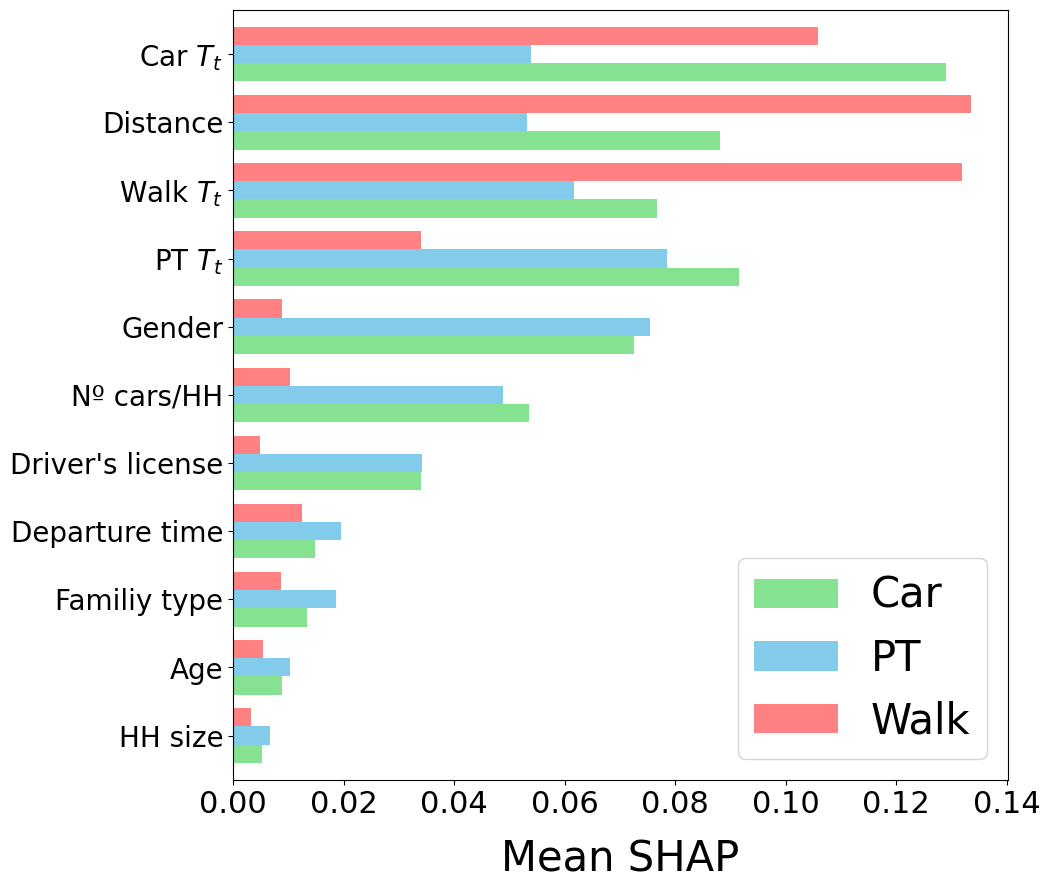

In [134]:
mean_0 = np.mean(np.abs(shap_values.values[:, :, 0]), axis=0)
mean_1 = np.mean(np.abs(shap_values.values[:, :, 1]), axis=0)
mean_2 = np.mean(np.abs(shap_values.values[:, :, 2]), axis=0)

df_shap = pd.DataFrame({'Car': mean_0, 'PT': mean_1, 'Walk': mean_2})
# df_shap = pd.DataFrame({0: mean_0, 1: mean_1, 2: mean_2})

# Ordenar
df_shap['Total'] = df_shap.sum(axis=1)
df_shap_sorted = df_shap.sort_values(by='Total', ascending=True)
df_shap_sorted = df_shap_sorted.drop(columns=['Total'])

variables = ['Departure time', 'HH size', 'Nº cars/HH', 'Gender', 'Age', 'Driver\'s license', 'Car $T_t$', 'Distance', 'Walk $T_t$', 'PT $T_t$', 'Familiy type']
aux = pd.DataFrame({
    'Feature': variables,
    'Value': df_shap['Total']
})
aux_sorted = aux.sort_values(by='Value', ascending=True)
variables_final = aux_sorted['Feature']

# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
colors = ['red', 'blue', 'green']
colors = [(0.839, 0.152, 0.156), (0.1, 0.3, 0.999), (0.172, 0.627, 0.172)]
colors = ['#84E291', '#83CBEB', '#FF8181']

fig, ax = plt.subplots(1, 1, figsize=(10,10))
df_shap_sorted.plot.barh(ax=ax, width=0.8, color=colors)
# df_shap = df_shap.T

ax.set_xlabel("Mean SHAP", size=30, labelpad=14)
# ax.set_ylabel("Features", size=30, labelpad=20)
ax.set_yticklabels(variables_final, size=20)
ax.tick_params(axis='x', labelsize=22)
ax.legend(fontsize=30)

In [79]:
def map_preds(preds):
    mapping = {'Car': 0, 'Walk': 1, 'PT': 2}
    mapped_preds = [mapping[pred] if pred in mapping else None for pred in preds]
    return mapped_preds

preds = model.predict(X_test)
preds = map_preds(preds)

new_shap_values = []
for i, pred in enumerate(preds):
    new_shap_values.append(shap_values.values[i][:, pred])

shap_values.values = np.array(new_shap_values)
print(shap_values.shape)

(2031, 11)


In [85]:
# shap.plots.bar(shap_values)
# shap.plots.beeswarm(shap_values)
# shap.plots.waterfall(shap_values)

ValueError: The waterfall plot can currently only plot a single explanation, but a matrix of explanations (shape (2031, 11)) was passed! Perhaps try `shap.plots.waterfall(shap_values[0])` or for multi-output models, try `shap.plots.waterfall(shap_values[0, 0])`.

In [84]:
np.shape(shap_values.values)

(2031, 11)

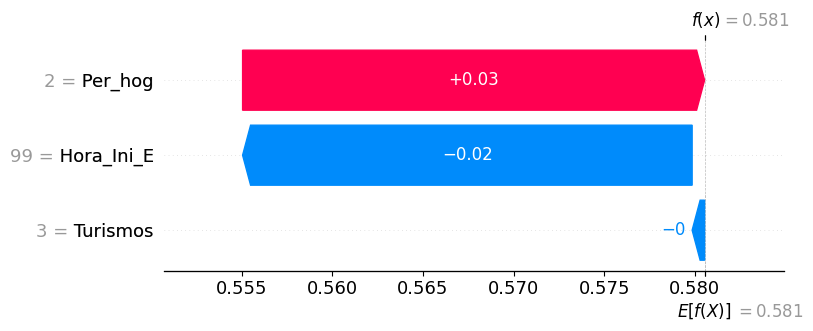

In [181]:
import shap
import matplotlib.pyplot as plt

# Assuming 'explainer' and 'X_train' are already defined and used as shown:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# Select SHAP values for the first sample and a specific class
sample_index = 0
class_index = 0  # Adjust based on the class of interest

selected_shap_values = shap_values.values[sample_index, class_index, :]
selected_feature_values = X_train.iloc[sample_index]
base_value = shap_values.base_values[sample_index, class_index]

# Create a waterfall plot for the selected instance and class
# Set max_display to the number of features you want to show
shap.plots.waterfall(shap.Explanation(values=selected_shap_values,
                                      base_values=base_value,
                                      data=selected_feature_values,
                                      feature_names=X_train.columns.tolist()),
                     max_display=11)  # Adjust this to show more features


In [68]:
X_test

,Hora_Ini_E,Per_hog,Turismos,Sexo,Edad,crnt_tur,drive_tt,distance,walk_tt,transit_tt_gm,Tipo_familia
4,106,2,1,1,5,1,1.725333,768.076,12.326833,11.0,2
5,103,1,1,1,6,1,9.499783,5877.712,81.831450,32.0,3
7,107,2,2,1,4,1,9.773567,6011.384,83.032533,28.0,6
12,118,2,2,2,6,2,9.331617,4642.410,76.662717,26.0,3
13,111,1,3,2,4,1,1.240750,583.437,9.058750,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...
10307,77,2,1,1,4,2,1.916683,1022.297,14.144733,16.0,2
10312,109,3,3,2,5,1,1.435050,648.794,7.445583,9.0,4
10313,83,2,1,1,4,2,2.604183,1240.299,15.294017,18.0,2
10316,93,1,1,1,2,2,1.938700,862.164,14.051100,18.0,2


In [176]:
shap.plots.waterfall(shap_values[0])

TypeError: only length-1 arrays can be converted to Python scalars

In [160]:
X_test

,Hora_Ini_E,Per_hog,Turismos,Sexo,Edad,crnt_tur,drive_tt,distance,walk_tt,transit_tt_gm,Tipo_familia
9250,166,2,3,1,5,1,14.547600,14529.653,225.481133,51.0,4
1217,102,2,2,1,6,1,14.115783,7433.069,79.716333,59.0,4
2227,94,2,1,2,4,2,1.472300,588.940,10.074150,8.0,2
6202,67,2,4,1,2,1,9.977433,7879.266,122.603800,44.0,6
96,82,2,2,2,5,1,4.459133,1848.681,30.184000,15.0,4
...,...,...,...,...,...,...,...,...,...,...,...
5727,185,3,3,1,4,1,3.716700,1486.721,25.044983,11.0,2
1467,194,2,2,2,4,1,2.907483,1222.582,20.605767,18.0,2
7372,154,2,2,1,6,1,27.476900,29412.736,502.904367,92.0,2
9658,98,2,1,2,4,2,2.241333,1026.332,17.077867,16.0,4


In [ ]:
import shap
import matplotlib.pyplot as plt
shap_values = explainer.shap_values(X_test)
# Genera el gráfico de resumen
shap.summary_plot(shap_values[0], X_test, show=False)
# Ajusta el tamaño de la letra del eje y
plt.gca().tick_params(axis='y', labelsize=7)
# Muestra el gráfico
plt.show()

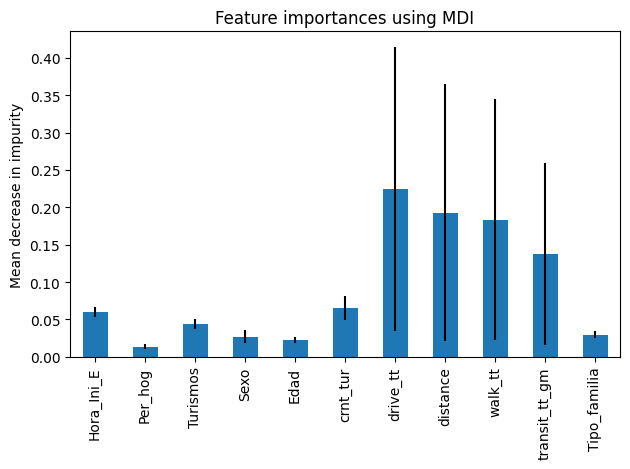

In [165]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
import pandas as pd
# forest_importances = pd.Series(importances, index=df_4.drop(columns=['Modo', 'Group']).columns)
columns_to_use = df.drop(columns=["Modo", 'Dur_Tot', "Group", "O_lat", "O_long", "D_lat", "D_long", 'times', 'destination_coords', 'chosen_time', '30%', 'transit_tt', 'gm_ua', "Mun_Ori", "Mun_Des"]).columns
forest_importances = pd.Series(importances, index=columns_to_use)

variables_to_exclude = []

forest_importances = forest_importances.drop(variables_to_exclude)
# filtered_indices = [np.where(columns_to_use == feature)[0][0] for feature in forest_importances.index]

# Now, use these filtered indices to select the matching elements from the std array
# std_filtered = std[filtered_indices]

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()